In [1]:
import codecs
import os
import numpy as np
from collections import Counter, OrderedDict
journos_info = dict()
journos_ids = list()
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#journos_file = codecs.open(dirname+'uk/personalAccounts_423.txt', 'r')
#dirname = '/home/clau/Documents/journal_five_countries/'
dirname = '/home/clau/Documents/journalists2017_personas/'

def load_journos_ids():
    journos_file = codecs.open(dirname+'ireland_ids.txt', 'r')
    for line in journos_file:
        journos_ids.append(line.strip())
    journos_file.close()
    return journos_ids

def load_journos_info():
    journos_file = codecs.open(dirname+'irish_journos_info.txt')
    for line in journos_file:
        parts = line.split('\t')
        journos_info['@'+parts[3].lower()] = str(parts[0])+'\t'+parts[1]+'\t'+parts[2]+'\t'+parts[4].strip()
    journos_file.close()
    return journos_info

def populate_mentioned_journos_list():
    #journos_file = codecs.open(dirname+'uk_journos_info.txt')
    mentioned_journos_file = codecs.open(dirname+'mentioned_journalists_ireland.txt')
    mentioned_journos_list = list()
    mentioned_journos_list.append('user_id')
    for line in mentioned_journos_file:
        mentioned_journos_list.append(line.strip())
    mentioned_journos_file.close()
    return mentioned_journos_list

In [13]:
for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        these_journos = set()
        total = 0
        new_total = 0
        total_weekend = 0
        total_morning = 0
        total_afternoon = 0
        total_evening = 0
        cat_days_blocks = Counter()
        #this_user_tweets = codecs.open(dirname+'/audience_tweets_uk/'+file1, 'r')
        #this_user_interactions = codecs.open(dirname+'/audience_interactions_uk/'+file1, 'w')
        this_user_tweets = codecs.open(dirname+'/audience_tweets_ireland/'+file1, 'r')
        this_user_retweets = codecs.open(dirname+'/audience_retweets_ireland/'+file1, 'w')
        #this_user_interactions = codecs.open(dirname+'/audience_interactions_ireland/'+file1, 'w')
        for line in this_user_tweets:
            pieces = line.split('\t')
            while len(pieces) < 2:
                line = line.replace('\n', ' ').replace('\r',' ') + next(this_user_tweets)
                pieces = line.split('\t')
            tweet_text = pieces[0]
            if 'RT @' in tweet_text:
                this_user_retweets.write(tweet_text+'\n')
        this_user_tweets.close()
        this_user_retweets.close()

CONSTRUCT VECTORS

In [2]:
#journos_file = codecs.open(dirname+'uk/personalAccounts_423.txt', 'r')
dirname = '/home/clau/Documents/journalists2017_personas/'

def load_journos_ids():
    journos_file = codecs.open(dirname+'ireland_ids.txt', 'r')
    for line in journos_file:
        journos_ids.append(line.strip())
    journos_file.close()
    return journos_ids

def load_journos_info():
    journos_file = codecs.open(dirname+'irish_journos_info.txt')
    for line in journos_file:
        parts = line.split('\t')
        journos_info['@'+parts[3].lower()] = str(parts[0])+'\t'+parts[1]+'\t'+parts[2]+'\t'+parts[4].strip()
    journos_file.close()
    return journos_info

# def populate_mentioned_journos_list():
#     #journos_file = codecs.open(dirname+'uk_journos_info.txt')
#     mentioned_journos_file = codecs.open(dirname+'mentioned_journalists_ireland.txt')
#     mentioned_journos_list = list()
#     mentioned_journos_list.append('user_id')
#     for line in mentioned_journos_file:
#         mentioned_journos_list.append(line.strip())
#     mentioned_journos_file.close()
#     return mentioned_journos_list

categories = ['business']#business,'politics','lifestyle','sci&tech','sports','breaking_news']
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
blocks = ['morning','afternoon','evening']
weekends = ['Sat', 'Sun']

keys = ''
user_journos = Counter()
journos_info = load_journos_info()

#empty_journos_mentioned = pd.DataFrame(columns=mentioned_journos_list)

#for file1 in os.listdir(dirname+'/audience_tweets_uk/'):
for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        these_journos = set()
        total = 0
        new_total = 0
        total_weekend = 0
        total_morning = 0
        total_afternoon = 0
        total_evening = 0
        cat_days_blocks = Counter()
        news_cat = ''
        #this_user_tweets = codecs.open(dirname+'/audience_tweets_uk/'+file1, 'r')
        #this_user_interactions = codecs.open(dirname+'/audience_interactions_uk/'+file1, 'w')
        this_user_tweets = codecs.open(dirname+'/audience_tweets_ireland/'+file1, 'r')
        this_user_interactions = codecs.open(dirname+'/audience_interactions_ireland/'+file1, 'w')
        for line in this_user_tweets:
            pieces = line.split('\t')
            while len(pieces) < 2:
                line = line.replace('\n', ' ').replace('\r',' ') + next(this_user_tweets)
                pieces = line.split('\t')
            tweet_text = pieces[0]
            this_journo = ''
            for k in journos_info.keys():
                if k in tweet_text.lower():
                    this_journo = k+'\t'+journos_info[k]
                    npieces = journos_info[k].split('\t')
                    news_cat = npieces[3]
            tweet_date = pieces[1].split(' ')
            day = tweet_date[0]
            weekend = 0
            if day=='Sat' or day=='Sun':
                weekend = 1
            month = tweet_date[1]
            hour = tweet_date[3].split(':')
            hour = int(hour[0])
            if hour >= 00 and hour < 12:
                block = 'morning'
            elif hour >= 12 and hour < 18:
                block = 'afternoon'
            elif hour >= 18 and hour <= 23:
                block = 'evening'
            cat_days_blocks[news_cat+'\t'+day+'\t'+block] += 1
            #print(this_journo)
            if this_journo != '':
                journo_bits = this_journo.split('\t')
#                 print('!!!!!!!!!!!!!!!!!!'+file1)
#                 print(this_journo)
                this_user_interactions.write(this_journo+'\t'+file1.replace('.txt','')+'\t'+day+'\t'+str(weekend)+'\t'+block+'\n')
                #these_journos.add(journo_bits[4])
                user_journos[file1.replace('.txt','')+','+journo_bits[3]] += 1
                #mentioned_journos.add(journo_bits[0])
                #print(file1.replace('.txt','')+','+str(len(these_journos)))
        #print(file1.replace('.txt','')+'\t'+result)
        this_user_tweets.close()
# for k, v in user_journos.items():
#     print(k+','+str(v))
# for j in mentioned_journos:
#     print(j)
        #this_user_interactions.close()
#         vector = ''
#         full_vector = ''
#         for c in categories:
#             for d in days:
#                 for b in blocks:
#                     total = total + cat_days_blocks[c+'\t'+d+'\t'+b]
#         for c in categories:
#             for w in weekends:
#                 total_weekend = total_weekend + cat_days_blocks[c+'\t'+w+'\t'+b]
#         for c in categories:
#             for d in days:
#                 total_morning = total_morning + cat_days_blocks[c+'\t'+d+'\tmorning']
#                 total_afternoon = total_afternoon +cat_days_blocks[c+'\t'+d+'\tafternoon']
#                 total_evening = total_evening + cat_days_blocks[c+'\t'+d+'\tevening']
#         if total > 5:
#             for c in categories:
#                 for d in days:
#                     for b in blocks:
#                             #print(cat_days_blocks[c+'\t'+d+'\t'+b])
#                             #print(total)
#                         this_block = cat_days_blocks[c+'\t'+d+'\t'+b]/float(total)
#                         vector = vector+','+str(this_block)
#                     #print(file1.replace('.txt','')+vector)
#                 vector = str(total_weekend/float(total))+','+str((total-total_weekend)/float(total))+','+str(total_morning/float(total))+','+str(total_afternoon/float(total))+','+str(total_evening/float(total))
#         else:
#             print()
#         features = []
#         features = vector.split(',')
#         for f in features:
#             if len(f) > 0:
#                 new_total += float(f)
#         for f in features:
#             if len(f) > 0:
#                 full_vector = full_vector +','+str(float(f)/float(new_total))
#             #print(str(total_weekend/float(total))+','+str((total-total_weekend)/float(total))+','+str(total_morning/float(total))+','+str(total_afternoon/float(total))+','+str(total_evening/float(total)))
#                 #print(file1.replace('.txt',''))
#         print(full_vector)

# EXPLORE BEHAVIOR AND CONSTRUCT DATAFRAMES -- ALL CATEGORIES

In [93]:
dirname = '/home/clau/Documents/journal_five_countries/'
journos_file = codecs.open(dirname+'ireland_ids.txt', 'r')
for line in journos_file:
    journos_ids.append(line.strip())
journos_file.close()

categories = ['business','politics','lifestyle','sci&tech','sports','breaking_news']
all_days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekends = ['Sat', 'Sun']
weekdays = ['Mon','Tue','Wed','Thu','Fri']
weekdays_minus_fri = ['Mon','Tue','Wed','Thu']
fri = ['Fri']
fri_sat = ['Fri', 'Sat']
sat = ['Sat']
sun = ['Sun']

journos_file = codecs.open(dirname+'irish_journos_info.txt')

lambdafunc = lambda x: pd.Series([datetime(x['date']).weekday()])

for line in journos_file:
    parts = line.split('\t')
    journos_info['@'+parts[3].lower()] = str(parts[0])+'\t'+parts[1]+'\t'+parts[2]+'\t'+parts[4].strip()
journos_file.close()

empty_all_days = pd.DataFrame(columns=categories)

for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        this_user_tweets = codecs.open(dirname+'/audience_interactions_ireland/'+file1, 'r')
        user_df = pd.read_csv(dirname+'/audience_interactions_ireland/'+file1, sep="\t", header=None, names=["journo", "journo_id", "org", "journo_gender", "category", "user_id", "day", "weekend", "day_block"])
        days_df = user_df.groupby(['category'])['category'].count().reset_index(name=file1.replace('.txt', ''))
        cols = [file1.replace('.txt', '')]
        days_df[cols] = days_df[cols].div(days_df[cols].sum(axis=0)).multiply(100)
        days_df = days_df.set_index('category').T
        empty_all_days = empty_all_days.append(days_df)
        #break
my_cols = categories
all_days = empty_all_days[my_cols]
all_days = all_days.fillna(value=0)
#all_days = all_days.loc[all_days['business'] > 20]
all_days.to_csv(path_or_buf=dirname+'all_vectors.csv', sep=',', na_rep='', float_format=None, columns=None, header=True)

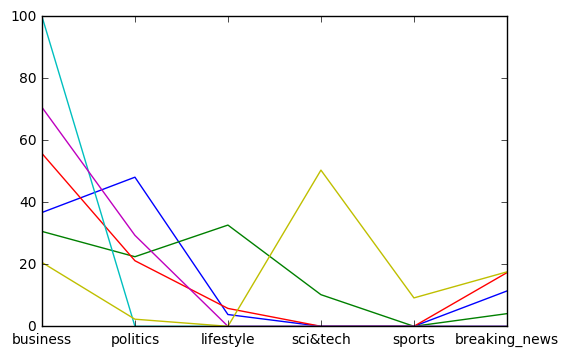

In [90]:
#sns.swarmplot(data=all_days)
#sns.boxplot(data=all_days)
#sns.violinplot(data=all_days)
#sns.pointplot(data=all_days)
i = 0
while i < 6:
    all_days.iloc[i].plot()
    i+=1

## EXPLORE BEHAVIOR AND CONSTRUCT DATAFRAMES -- PER CATEGORY

In [148]:
dirname = '/home/clau/Documents/journal_five_countries/'
journos_file = codecs.open(dirname+'ireland_ids.txt', 'r')
for line in journos_file:
    journos_ids.append(line.strip())
journos_file.close()
journos_file = codecs.open(dirname+'irish_journos_info.txt')

all_days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekends = ['Sat', 'Sun']
weekdays = ['Mon','Tue','Wed','Thu','Fri']
weekdays_minus_fri = ['Mon','Tue','Wed','Thu']
fri = ['Fri']
fri_sat = ['Fri', 'Sat']
sat = ['Sat']
sun = ['Sun']
day_blocks = ["female", "male"]

for line in journos_file:
    parts = line.split('\t')
    journos_info['@'+parts[3].lower()] = str(parts[0])+'\t'+parts[1]+'\t'+parts[2]+'\t'+parts[4].strip()
journos_file.close()

empty_all_days = pd.DataFrame(columns=day_blocks)

for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        this_user_tweets = codecs.open(dirname+'/audience_interactions_ireland/'+file1, 'r')
        user_df = pd.read_csv(dirname+'/audience_interactions_ireland/'+file1, sep="\t", header=None, names=["journo", "journo_id", "org", "journo_gender", "category", "user_id", "day", "weekend", "day_block"])
        #cat_df = user_df[(user_df['category'] == 'sports') & (user_df['day_block'].isin(day_blocks))] 
        days_df = user_df.groupby(['journo_gender'])['journo_gender'].count().reset_index(name=file1.replace('.txt', ''))
        #days_df = cat_df.groupby(['day_block'])['day_block'].count().reset_index(name=file1.replace('.txt', ''))
        cols = [file1.replace('.txt', '')]
        days_df[cols] = days_df[cols].div(days_df[cols].sum(axis=0)).multiply(100)
        days_df = days_df.set_index('journo_gender').T
        empty_all_days = empty_all_days.append(days_df)
        #break

In [149]:
my_cols = day_blocks
all_days = empty_all_days[my_cols]
all_days = all_days.fillna(value=0)
all_days

,female,male
25718192,87.735849,12.264151
26284918,0.000000,100.000000
4451242096,21.541950,78.458050
119870612,18.965517,81.034483
28024611,44.036697,55.963303
48669581,0.000000,100.000000
222513166,0.000000,100.000000
188343593,7.216495,92.783505
4881054129,0.000000,100.000000
562681154,0.000000,100.000000


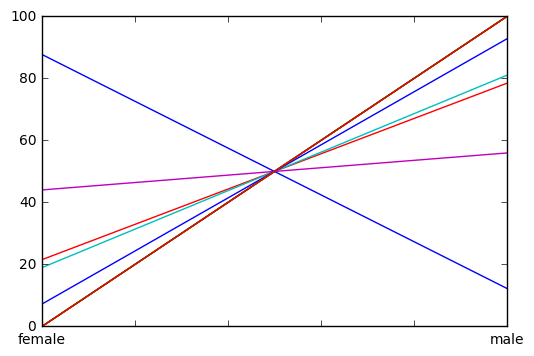

In [151]:
i = 0
while i < 10:
    all_days.iloc[i].plot()
    i+=1
# sns.stripplot(data=all_days)
# sns.pointplot(data=all_days)

In [95]:
dirname = '/home/clau/Documents/journal_five_countries/'

#load journalists' ids
journos_file = codecs.open(dirname+'ireland_ids.txt', 'r')
for line in journos_file:
    journos_ids.append(line.strip())
journos_file.close()


user_journos = dict()
#load journalists' info
journos_file = codecs.open(dirname+'irish_journos_info.txt')
#load mentioned journalists
mentioned_journos_file = codecs.open(dirname+'mentioned_journalists_ireland.txt')
mentioned_journos_list = list()
for line in mentioned_journos_file:
    mentioned_journos_list.append(line.strip())
mentioned_journos_file.close()

#populate journalists' info list
for line in journos_file:
    parts = line.split('\t')
    journos_info['@'+parts[3].lower()] = str(parts[0])+'\t'+parts[1]+'\t'+parts[2]+'\t'+parts[4].strip()
journos_file.close()

#create empty dataframe with headings
all_journos_mentioned = pd.DataFrame(columns=mentioned_journos_list)

#extract users interactions, create a dataframe for each user and append it to a global dataframe
for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        user_journos = user_journos.fromkeys(mentioned_journos_list, 0)
        cat_days_blocks = Counter()
        this_user_tweets = codecs.open(dirname+'/audience_tweets_ireland/'+file1, 'r')
        for line in this_user_tweets:
            pieces = line.split('\t')
            while len(pieces) < 2:
                line = line.replace('\n', ' ').replace('\r',' ') + next(this_user_tweets)
                pieces = line.split('\t')
            tweet_text = pieces[0]
            for k in journos_info.keys():
                if k in tweet_text:
                    this_journo = k+'\t'+journos_info[k]
            if this_journo != '':
                journo_bits = this_journo.split('\t')
                user_journos[journo_bits[0]] = 1
        result_df = pd.DataFrame(user_journos, index=[file1.replace('.txt','')])
        all_journos_mentioned = empty_journos_mentioned.append(result_df)
        this_user_tweets.close()

In [96]:
all_journos_mentioned

,@adrianweckler,@annesheridan1,@anthonymurnane,@boucherhayes,@brianodtv3,@bryansixone,@caitrionaperry,@carlobrien,@carrollste,@cathalmaccoille,...,@sineadkissane,@siobhanbtv3,@sodonnellnews,@sportsdes,@sullyirishtimes,@tconnellyrte,@tomlyonsbiz,@tonyleen,@viviennetraynor,@willgoodbody
25718192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26284918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4451242096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119870612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28024611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48669581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222513166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188343593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4881054129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562681154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_asint = all_journos_mentioned.astype(int)
coocc = df_asint.T.dot(df_asint)
np.fill_diagonal(coocc.values, 0)
coocc

,@adrianweckler,@annesheridan1,@anthonymurnane,@boucherhayes,@brianodtv3,@bryansixone,@caitrionaperry,@carlobrien,@carrollste,@cathalmaccoille,...,@sineadkissane,@siobhanbtv3,@sodonnellnews,@sportsdes,@sullyirishtimes,@tconnellyrte,@tomlyonsbiz,@tonyleen,@viviennetraynor,@willgoodbody
@adrianweckler,0,1,8,50,0,4,0,5,3,2,...,4,1,0,22,2,0,0,5,5,13
@annesheridan1,1,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,0
@anthonymurnane,8,0,0,13,0,2,0,1,0,1,...,0,1,0,6,0,0,0,0,4,4
@boucherhayes,50,5,13,0,1,7,1,12,6,8,...,6,2,2,49,1,1,3,9,15,25
@brianodtv3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
@bryansixone,4,0,2,7,0,0,0,2,2,0,...,1,1,0,2,0,0,0,1,2,3
@caitrionaperry,0,0,0,1,0,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,1
@carlobrien,5,0,1,12,0,2,2,0,2,2,...,2,2,0,4,1,0,0,0,3,5
@carrollste,3,0,0,6,0,2,0,2,0,0,...,1,1,0,0,0,0,0,0,2,2
@cathalmaccoille,2,0,1,8,0,0,1,2,0,0,...,0,0,0,1,0,3,2,1,0,4


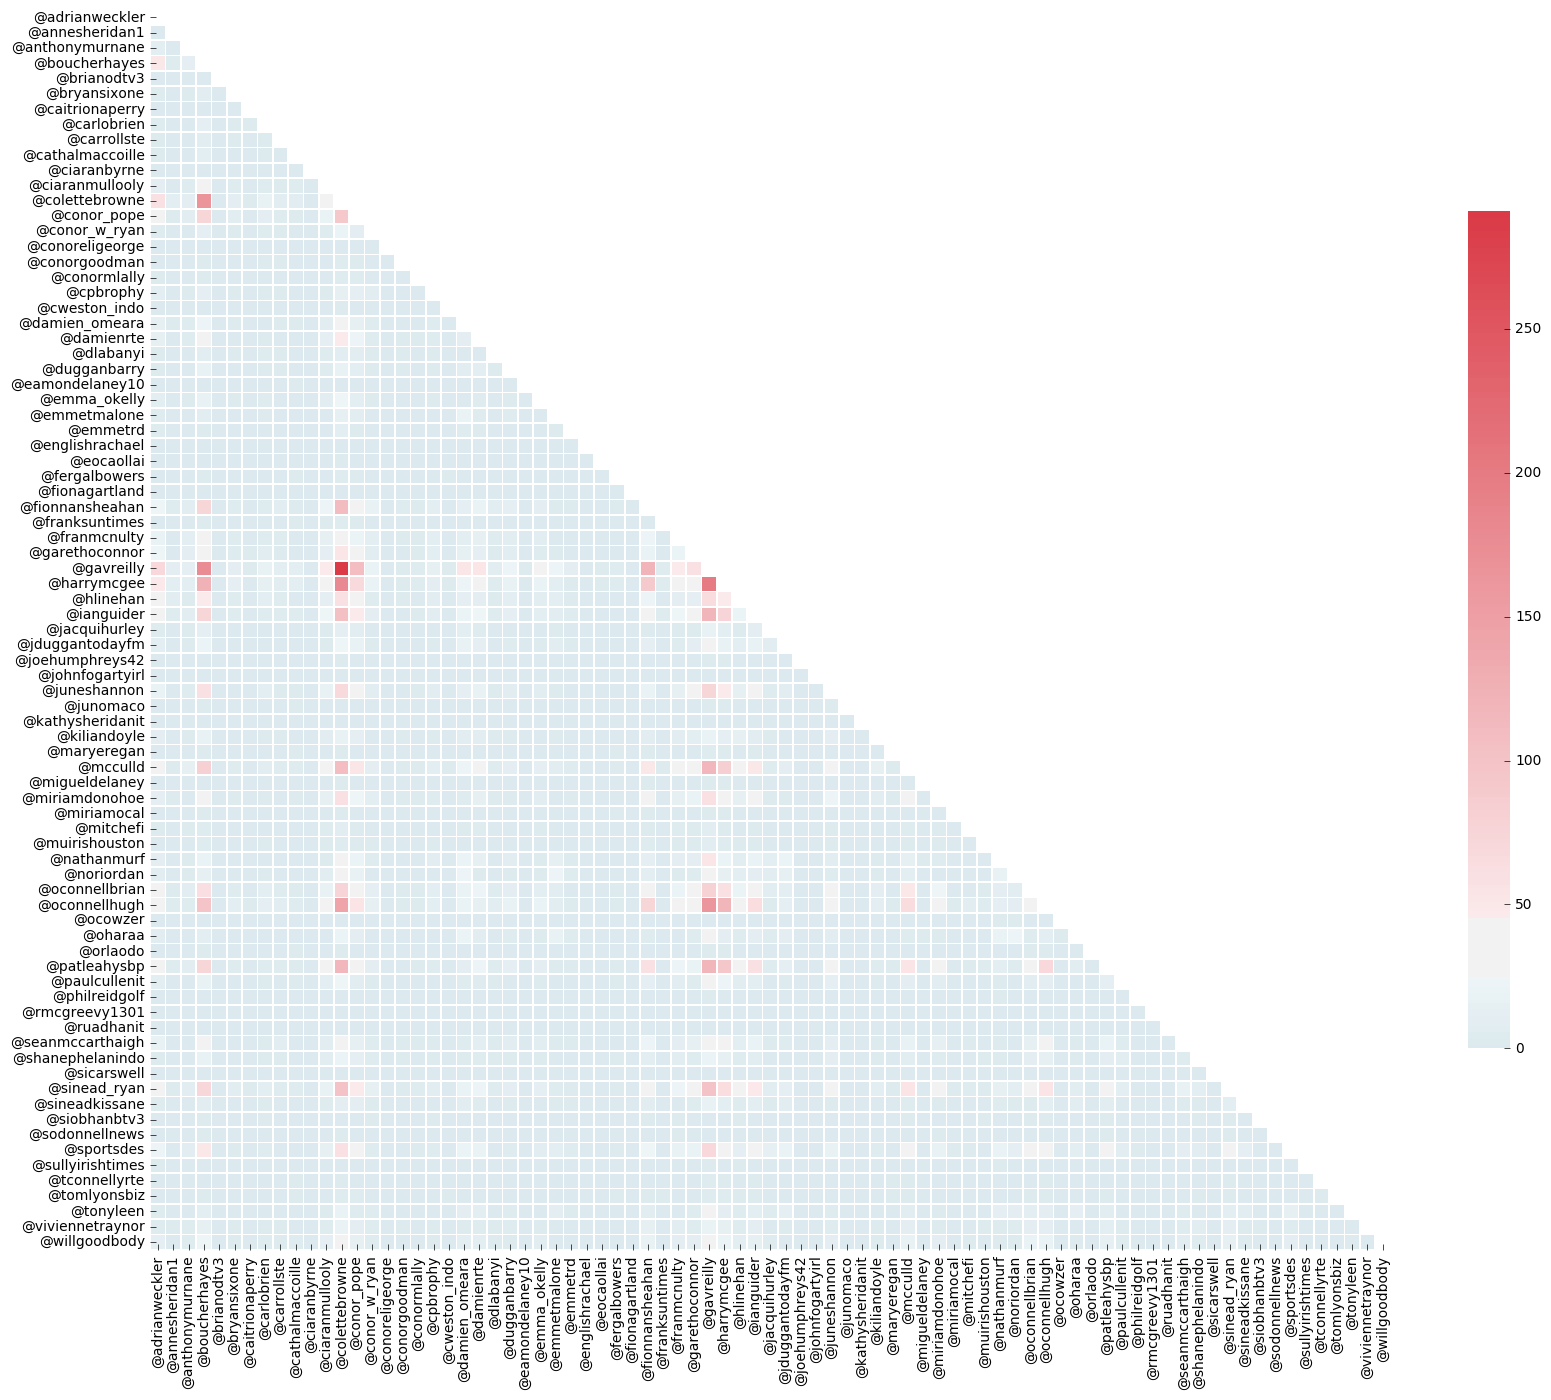

In [136]:
# Generate a mask for the upper triangle
mask = np.zeros_like(coocc, dtype=np.int)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(coocc, mask=mask, cmap=cmap, vmax=coocc.values.max(), center=35,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

# creating personas per journalist

In [159]:
dirname = '/home/clau/Documents/journal_five_countries/'


#load journalists' ids and info
journos_ids = load_journos_ids()
journos_info = load_journos_info()

user_journos = dict()
#load journalists' info
journos_file = codecs.open(dirname+'irish_journos_info.txt')
#load mentioned journalists
mentioned_journos_list = populate_mentioned_journos_list()


#create empty dataframe with headings
all_journos_mentioned = pd.DataFrame(columns=mentioned_journos_list)

#extract users interactions, create a dataframe for each user and append it to a global dataframe
for file1 in os.listdir(dirname+'/audience_tweets_ireland/'):
    if file1.replace('.txt','') not in journos_ids:
        user_journos = user_journos.fromkeys(mentioned_journos_list, 0)
        cat_days_blocks = Counter()
        this_user_tweets = codecs.open(dirname+'/audience_tweets_ireland/'+file1, 'r')
        for line in this_user_tweets:
            pieces = line.split('\t')
            while len(pieces) < 2:
                line = line.replace('\n', ' ').replace('\r',' ') + next(this_user_tweets)
                pieces = line.split('\t')
            tweet_text = pieces[0]
            tweet_time = pieces[1]
            for k in journos_info.keys():
                if k in tweet_text:
                    this_journo = k+'\t'+journos_info[k]
            if this_journo != '':
                journo_bits = this_journo.split('\t')
                user_journos[journo_bits[0]] = 1
        result_df = pd.DataFrame(user_journos, index=[file1.replace('.txt','')])
        all_journos_mentioned = empty_journos_mentioned.append(result_df)
        this_user_tweets.close()